In [74]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# Specify each path

In [75]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.hdf5'
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

# Set number of classes

In [76]:
NUM_CLASSES = 62

# Dataset reading

In [77]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21*2 + 21*2 + 2*1) + 1)))

In [78]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# Model building

In [80]:
# model = tf.keras.models.Sequential([
#     tf.keras.layers.Input((21*2 + 21*2 + 2*1 )),
#     tf.keras.layers.Dropout(0.2),
#     tf.keras.layers.Dense(20, activation='relu'),
#     tf.keras.layers.Dropout(0.4),
#     tf.keras.layers.Dense(10, activation='relu'),
#     tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
# ])

In [81]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21*2 + 21*2 + 2*1 )),
    tf.keras.layers.Dense(80, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(120, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [82]:
# model = tf.keras.models.Sequential([
#     tf.keras.layers.Input((21*2 + 21*2 + 2*1 )),
#     tf.keras.layers.Dropout(0.2),
#     tf.keras.layers.Dense(100, activation='relu'),
#     tf.keras.layers.Dropout(0.4),
#     tf.keras.layers.Dense(50, activation='relu'),
#     tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
# ])

In [83]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 80)                6960      
                                                                 
 dropout_6 (Dropout)         (None, 80)                0         
                                                                 
 dense_13 (Dense)            (None, 120)               9720      
                                                                 
 dropout_7 (Dropout)         (None, 120)               0         
                                                                 
 dense_14 (Dense)            (None, 50)                6050      
                                                                 
 dense_15 (Dense)            (None, 62)                3162      
                                                                 
Total params: 25892 (101.14 KB)
Trainable params: 2589

In [84]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [85]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [86]:
model.fit(
    X_train,
    y_train,
    epochs=50*NUM_CLASSES,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/3100
41/43 [===========================>..] - ETA: 0s - loss: 3.8991 - accuracy: 0.0612
Epoch 1: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
43/43 [==============================] - 3s 25ms/step - loss: 3.8874 - accuracy: 0.0624 - val_loss: 3.4914 - val_accuracy: 0.0960
Epoch 2/3100
13/43 [========>.....................] - ETA: 0s - loss: 3.4951 - accuracy: 0.0865

C:\Users\Sanjay\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


41/43 [===========================>..] - ETA: 0s - loss: 3.2785 - accuracy: 0.1126
Epoch 2: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
43/43 [==============================] - 1s 15ms/step - loss: 3.2641 - accuracy: 0.1145 - val_loss: 2.7355 - val_accuracy: 0.1817
Epoch 3/3100
41/43 [===========================>..] - ETA: 0s - loss: 2.6848 - accuracy: 0.1942
Epoch 3: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
43/43 [==============================] - 1s 15ms/step - loss: 2.6737 - accuracy: 0.1952 - val_loss: 2.1715 - val_accuracy: 0.3699
Epoch 4/3100
38/43 [=========================>....] - ETA: 0s - loss: 2.2769 - accuracy: 0.2823
Epoch 4: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
43/43 [==============================] - 1s 13ms/step - loss: 2.2579 - accuracy: 0.2871 - val_loss: 1.7963 - val_accuracy: 0.4896
Epoch 5/3100
42/43 [============================>.] - ETA: 0s - loss: 1.9964 - accuracy: 0.3439
Epoch 5: sa

39/43 [==========================>...] - ETA: 0s - loss: 0.4797 - accuracy: 0.8255
Epoch 29: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
43/43 [==============================] - 1s 14ms/step - loss: 0.4801 - accuracy: 0.8251 - val_loss: 0.2967 - val_accuracy: 0.9056
Epoch 30/3100
40/43 [==========================>...] - ETA: 0s - loss: 0.4754 - accuracy: 0.8324
Epoch 30: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
43/43 [==============================] - 1s 14ms/step - loss: 0.4745 - accuracy: 0.8331 - val_loss: 0.2893 - val_accuracy: 0.9061
Epoch 31/3100
40/43 [==========================>...] - ETA: 0s - loss: 0.4595 - accuracy: 0.8328
Epoch 31: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
43/43 [==============================] - 1s 14ms/step - loss: 0.4602 - accuracy: 0.8337 - val_loss: 0.2721 - val_accuracy: 0.9243
Epoch 32/3100
41/43 [===========================>..] - ETA: 0s - loss: 0.4434 - accuracy: 0.8399
Epoch

Epoch 56/3100
43/43 [==============================] - ETA: 0s - loss: 0.2633 - accuracy: 0.9043
Epoch 56: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
43/43 [==============================] - 1s 14ms/step - loss: 0.2633 - accuracy: 0.9043 - val_loss: 0.1511 - val_accuracy: 0.9561
Epoch 57/3100
42/43 [============================>.] - ETA: 0s - loss: 0.2467 - accuracy: 0.9089
Epoch 57: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
43/43 [==============================] - 1s 14ms/step - loss: 0.2468 - accuracy: 0.9087 - val_loss: 0.1547 - val_accuracy: 0.9555
Epoch 58/3100
43/43 [==============================] - ETA: 0s - loss: 0.2548 - accuracy: 0.9100
Epoch 58: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
43/43 [==============================] - 1s 18ms/step - loss: 0.2548 - accuracy: 0.9100 - val_loss: 0.1466 - val_accuracy: 0.9605
Epoch 59/3100
38/43 [=========================>....] - ETA: 0s - loss: 0.2525 - accuracy

Epoch 83/3100
41/43 [===========================>..] - ETA: 0s - loss: 0.1777 - accuracy: 0.9364
Epoch 83: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
43/43 [==============================] - 1s 14ms/step - loss: 0.1779 - accuracy: 0.9361 - val_loss: 0.1022 - val_accuracy: 0.9764
Epoch 84/3100
42/43 [============================>.] - ETA: 0s - loss: 0.1799 - accuracy: 0.9342
Epoch 84: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
43/43 [==============================] - 1s 15ms/step - loss: 0.1798 - accuracy: 0.9341 - val_loss: 0.1027 - val_accuracy: 0.9748
Epoch 85/3100
40/43 [==========================>...] - ETA: 0s - loss: 0.1776 - accuracy: 0.9369
Epoch 85: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
43/43 [==============================] - 0s 10ms/step - loss: 0.1752 - accuracy: 0.9383 - val_loss: 0.1035 - val_accuracy: 0.9693
Epoch 86/3100
29/43 [===================>..........] - ETA: 0s - loss: 0.1653 - accuracy

Epoch 110/3100
38/43 [=========================>....] - ETA: 0s - loss: 0.1227 - accuracy: 0.9564
Epoch 110: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
43/43 [==============================] - 1s 14ms/step - loss: 0.1230 - accuracy: 0.9568 - val_loss: 0.0742 - val_accuracy: 0.9890
Epoch 111/3100
39/43 [==========================>...] - ETA: 0s - loss: 0.1252 - accuracy: 0.9581
Epoch 111: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
43/43 [==============================] - 1s 14ms/step - loss: 0.1271 - accuracy: 0.9579 - val_loss: 0.0707 - val_accuracy: 0.9868
Epoch 112/3100
39/43 [==========================>...] - ETA: 0s - loss: 0.1262 - accuracy: 0.9559
Epoch 112: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
43/43 [==============================] - 1s 14ms/step - loss: 0.1248 - accuracy: 0.9561 - val_loss: 0.0684 - val_accuracy: 0.9896
Epoch 113/3100
38/43 [=========================>....] - ETA: 0s - loss: 0.1149 - a

Epoch 137/3100
43/43 [==============================] - ETA: 0s - loss: 0.0910 - accuracy: 0.9704
Epoch 137: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
43/43 [==============================] - 1s 15ms/step - loss: 0.0910 - accuracy: 0.9704 - val_loss: 0.0506 - val_accuracy: 0.9923
Epoch 138/3100
41/43 [===========================>..] - ETA: 0s - loss: 0.0846 - accuracy: 0.9733
Epoch 138: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
43/43 [==============================] - 1s 14ms/step - loss: 0.0848 - accuracy: 0.9737 - val_loss: 0.0530 - val_accuracy: 0.9940
Epoch 139/3100
38/43 [=========================>....] - ETA: 0s - loss: 0.0963 - accuracy: 0.9690
Epoch 139: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
43/43 [==============================] - 1s 14ms/step - loss: 0.0948 - accuracy: 0.9696 - val_loss: 0.0529 - val_accuracy: 0.9929
Epoch 140/3100
42/43 [============================>.] - ETA: 0s - loss: 0.0914 - a

Epoch 164/3100
38/43 [=========================>....] - ETA: 0s - loss: 0.0766 - accuracy: 0.9762
Epoch 164: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
43/43 [==============================] - 1s 14ms/step - loss: 0.0744 - accuracy: 0.9766 - val_loss: 0.0483 - val_accuracy: 0.9951
Epoch 165/3100
42/43 [============================>.] - ETA: 0s - loss: 0.0846 - accuracy: 0.9697
Epoch 165: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
43/43 [==============================] - 1s 14ms/step - loss: 0.0846 - accuracy: 0.9696 - val_loss: 0.0536 - val_accuracy: 0.9918
Epoch 166/3100
43/43 [==============================] - ETA: 0s - loss: 0.0783 - accuracy: 0.9713
Epoch 166: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
43/43 [==============================] - 1s 14ms/step - loss: 0.0783 - accuracy: 0.9713 - val_loss: 0.0478 - val_accuracy: 0.9934
Epoch 167/3100
39/43 [==========================>...] - ETA: 0s - loss: 0.0766 - a

Epoch 191/3100
40/43 [==========================>...] - ETA: 0s - loss: 0.0610 - accuracy: 0.9809
Epoch 191: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
43/43 [==============================] - 1s 14ms/step - loss: 0.0609 - accuracy: 0.9806 - val_loss: 0.0374 - val_accuracy: 0.9967
Epoch 192/3100
43/43 [==============================] - ETA: 0s - loss: 0.0665 - accuracy: 0.9802
Epoch 192: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
43/43 [==============================] - 1s 14ms/step - loss: 0.0665 - accuracy: 0.9802 - val_loss: 0.0405 - val_accuracy: 0.9945
Epoch 193/3100
41/43 [===========================>..] - ETA: 0s - loss: 0.0702 - accuracy: 0.9754
Epoch 193: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
43/43 [==============================] - 1s 14ms/step - loss: 0.0691 - accuracy: 0.9758 - val_loss: 0.0385 - val_accuracy: 0.9962
Epoch 194/3100
40/43 [==========================>...] - ETA: 0s - loss: 0.0615 - a

Epoch 218/3100
37/43 [========================>.....] - ETA: 0s - loss: 0.0544 - accuracy: 0.9823
Epoch 218: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
43/43 [==============================] - 1s 14ms/step - loss: 0.0543 - accuracy: 0.9824 - val_loss: 0.0377 - val_accuracy: 0.9945
Epoch 219/3100
42/43 [============================>.] - ETA: 0s - loss: 0.0497 - accuracy: 0.9842
Epoch 219: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
43/43 [==============================] - 1s 14ms/step - loss: 0.0504 - accuracy: 0.9839 - val_loss: 0.0404 - val_accuracy: 0.9956
Epoch 220/3100
43/43 [==============================] - ETA: 0s - loss: 0.0548 - accuracy: 0.9815
Epoch 220: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
43/43 [==============================] - 1s 15ms/step - loss: 0.0548 - accuracy: 0.9815 - val_loss: 0.0374 - val_accuracy: 0.9962
Epoch 221/3100
39/43 [==========================>...] - ETA: 0s - loss: 0.0564 - a

Epoch 245/3100
42/43 [============================>.] - ETA: 0s - loss: 0.0495 - accuracy: 0.9812
Epoch 245: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
43/43 [==============================] - 1s 14ms/step - loss: 0.0495 - accuracy: 0.9813 - val_loss: 0.0309 - val_accuracy: 0.9962
Epoch 246/3100
39/43 [==========================>...] - ETA: 0s - loss: 0.0503 - accuracy: 0.9836
Epoch 246: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
43/43 [==============================] - 1s 14ms/step - loss: 0.0503 - accuracy: 0.9837 - val_loss: 0.0380 - val_accuracy: 0.9951
Epoch 247/3100
43/43 [==============================] - ETA: 0s - loss: 0.0495 - accuracy: 0.9850
Epoch 247: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
43/43 [==============================] - 1s 14ms/step - loss: 0.0495 - accuracy: 0.9850 - val_loss: 0.0362 - val_accuracy: 0.9956
Epoch 248/3100
42/43 [============================>.] - ETA: 0s - loss: 0.0465 - a

In [87]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

15/15 [==============================] - 0s 5ms/step - loss: 0.0380 - accuracy: 0.9956


In [88]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [89]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 [==============================] - 0s 175ms/step
[8.9700478e-17 6.0667386e-14 4.7157474e-19 8.5913563e-20 3.1887895e-12
 4.6984703e-13 9.4937226e-17 1.1327725e-12 2.7482729e-09 3.5821183e-14
 2.2410059e-16 7.6788575e-28 2.3682576e-30 5.2096616e-06 4.5581938e-11
 1.3959232e-22 8.0234343e-13 1.3744264e-17 2.0086767e-26 4.6065578e-20
 8.9663573e-16 1.1117177e-37 7.4422064e-28 7.0470194e-15 1.0888801e-16
 1.4353435e-20 6.7635518e-13 5.8580426e-18 3.0071789e-11 4.2580308e-27
 2.0105363e-29 2.3385021e-34 7.8165138e-30 5.3336549e-37 6.5603145e-20
 3.5205687e-17 9.9999475e-01 6.3028408e-18 1.6006382e-26 3.3838705e-21
 6.2688779e-21 1.3988380e-16 5.9641162e-16 5.4809882e-14 2.0526640e-21
 1.6186375e-23 7.5923558e-19 7.1148741e-22 3.3079313e-28 9.8885257e-18
 4.5696072e-14 2.9964500e-18 2.2135780e-25 3.8449577e-14 5.4066262e-21
 1.0395054e-10 5.1106645e-33 2.3333201e-23 3.3464721e-16 5.3677345e-32
 1.5065000e-29 7.3743559e-20]
36


# Confusion matrix

57/57 [==============================] - 0s 2ms/step


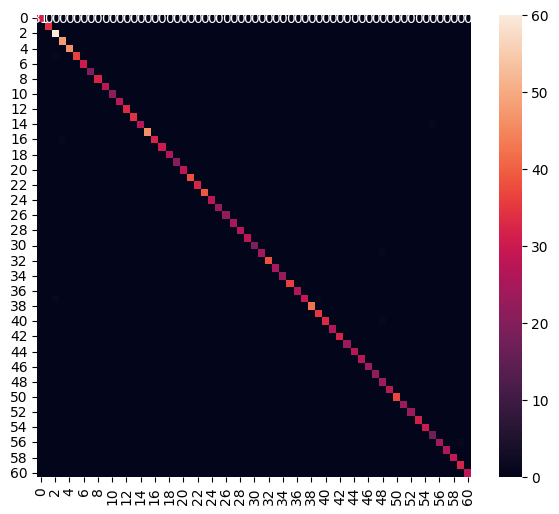

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        31
           1       1.00      1.00      1.00        34
           2       0.97      1.00      0.98        60
           3       0.98      1.00      0.99        48
           4       1.00      1.00      1.00        46
           5       1.00      0.97      0.99        37
           6       1.00      1.00      1.00        30
           7       1.00      1.00      1.00        19
           8       1.00      1.00      1.00        32
           9       1.00      1.00      1.00        28
          10       1.00      1.00      1.00        21
          11       1.00      1.00      1.00        28
          12       1.00      1.00      1.00        33
          13       1.00      1.00      1.00        34
          14       1.00      0.96      0.98        28
          15       1.00      1.00      1.00        46
          16       1.00      0.97      0.98        33
     

In [90]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Convert to model for Tensorflow-Lite

In [91]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

C:\Users\Sanjay\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [92]:
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\Sanjay\AppData\Local\Temp\tmp28pjcwrt\assets


INFO:tensorflow:Assets written to: C:\Users\Sanjay\AppData\Local\Temp\tmp28pjcwrt\assets


29616

# Inference test

In [93]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [94]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [95]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [96]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: total: 0 ns
Wall time: 0 ns


In [97]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[1.79002123e-16 6.66832176e-14 2.57437399e-19 8.29931182e-20
 2.02520943e-12 4.08861530e-13 1.30389486e-16 4.67145691e-13
 1.22594990e-09 5.32599071e-14 2.44477478e-16 1.10237774e-27
 2.16248455e-30 5.30618945e-06 6.63837041e-11 1.42162100e-22
 1.16490042e-12 1.50920674e-17 1.36261131e-26 3.85018519e-20
 5.28097038e-16 1.09202965e-37 1.15026426e-27 9.24823183e-15
 1.12028220e-16 1.25540079e-20 4.17258133e-13 4.98487285e-18
 3.86340820e-11 5.16295942e-27 1.26212230e-29 5.41709720e-34
 1.72277578e-29 6.18790219e-37 3.20724581e-20 2.87707843e-17
 9.99994636e-01 5.93501304e-18 1.37429923e-26 6.87315276e-21
 1.04821458e-20 2.43221726e-16 7.58880428e-16 1.33951064e-13
 6.36502274e-21 3.09748475e-23 1.16649992e-18 8.57392900e-22
 4.34570588e-28 7.93317410e-18 5.77317599e-14 4.12016926e-18
 2.67875642e-25 5.59672819e-14 6.60117836e-21 1.09876185e-10
 6.61959660e-33 1.68997498e-23 4.00368969e-16 1.47901792e-31
 6.10893423e-29 8.45990183e-20]
36
